# Random Forest

In this lab you will learn the most important aspects of the random forest learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import RandomForestClassifier.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
from sklearn.datasets import make_classification, make_regression

## Data Creation

First of all, we create a data set containing 1000 samples with 2 features and two classes:

In [ ]:
X, y = make_classification(n_samples = 1000,n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

    

6.083333333333333


<b>Exercise 1:</b>

Visualize the data set. It should look like this:
<img src="figures/dataset.png" width="600"/>

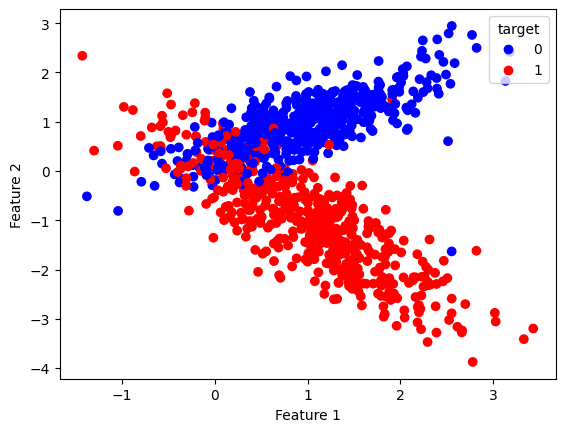

In [21]:
X = pd.DataFrame(X, columns=['feature1', 'feature2'])
y = pd.DataFrame(y, columns=['target'])
mydata = pd.concat([X, y], axis=1)
scatter = plt.scatter(mydata['feature1'], mydata['feature2'], c=mydata['target'], cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='target', loc='upper right')

plt.show()



<b>Exercise 2:</b>

We split our data into train and test data. Then we can train our model (a random forest) on the train data and evaluate the model on the hold out test data. We split the data in a way that we train our model on 67% of the data and test our model on 33% of the data.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)


Train a random forest on the training data and report the accuracy for this model on the train and test data using the default parameters of a random forest (from sklearn). What can you conclude from this? .

In [8]:

# 1. fit(X, y)
# Trains the random forest model on the dataset X with labels y.
# Each tree in the forest is trained on a bootstrap sample of the data.
# Example:
# clf.fit(X_train, y_train)

# 2. predict(X)
# Predicts class labels for the samples in X by aggregating the predictions from all individual trees (majority voting).
# Example:
# y_pred = clf.predict(X_test)

# 3. predict_proba(X)
# Returns the class probabilities for the samples in X.
# It averages the probabilities predicted by each tree.
# Example:
# y_proba = clf.predict_proba(X_test)

# 4. predict_log_proba(X)
# Similar to predict_proba, but returns the logarithm of the class probabilities.
# Example:
# y_log_proba = clf.predict_log_proba(X_test)

# 5. score(X, y)
# Computes the mean accuracy of the model on the given test data and labels.
# Example:
# accuracy = clf.score(X_test, y_test)

# 6. apply(X)
# For each sample in X, returns the index of the leaf node in each tree where the sample ends up.
# Useful for understanding the model's decisions or for advanced tasks like proximity analysis.
# Example:
# leaf_indices = clf.apply(X_test)

# 7. decision_path(X)
# Provides the decision path for each sample in X through each tree in the forest.
# Returns a sparse matrix indicating the nodes each sample passes through.
# Helpful for model introspection and understanding how decisions are made.
# Example:
# decision_paths = clf.decision_path(X_test)

# 8. feature_importances_
# An array of shape (n_features,) indicating the importance of each feature in the model.
# Importance is computed based on the (normalized) total reduction of the criterion (e.g., Gini impurity) brought by that feature.
# Example:
# importances = clf.feature_importances_

# 9. estimators_samples_
# A list where each element is an array of indices representing the samples used to train each individual tree.
# Relevant when bootstrap=True, as each tree is trained on a bootstrap sample of the data.
# Example:
# samples_per_tree = clf.estimators_samples_

# 10. get_params(deep=True)
# Returns a dictionary of the model's parameters.
# If deep=True, it will also return the parameters of nested estimators.
# Example:
# params = clf.get_params()

# 11. set_params(**params)
# Sets the parameters of the model.
# Useful for hyperparameter tuning, especially in conjunction with tools like GridSearchCV.
# Example:
# clf.set_params(n_estimators=200, max_depth=10)

# 12. get_metadata_routing()
# Retrieves the metadata routing configuration of the estimator.
# Part of scikit-learn's advanced API for handling additional data passed to estimators.
# Example:
# routing = clf.get_metadata_routing()

# 13. set_fit_request()
# Specifies additional metadata that should be passed to the fit method.
# Part of scikit-learn's advanced API, typically used in complex pipelines or when integrating with other tools.
# Example:
# clf.set_fit_request(sample_weight=True)

# 14. set_score_request()
# Specifies additional metadata that should be passed to the score method.
# Part of scikit-learn's advanced API, typically used in complex pipelines or when integrating with other tools.
# Example:
# clf.set_score_request(sample_weight=True)

In [31]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test.ravel()))

# """
# The parameters of a random forest classifier.

# (n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 

# min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 

# bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 

# ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
# """

### WRITE YOUR CODE HERE ###

#Given our results, 

#Also, all this problems are because of DF vs numpy stuff. 



0.9242424242424242


## Decision Boundary

Sometimes it is helpful to plot the decision boundary for a learned model. To do so, we create a grid of data points and calculate the probability of belonging to class 1. 
(This can only be done once we have trained the random forest classifier)

In [25]:
X_np = X.to_numpy()
x_min, x_max = X.iloc[:, 0].min(), X.iloc[:, 0].max()
y_min, y_max = X.iloc[:, 1].min(), X.iloc[:, 1].max()

# I seem to be having some problems because I changed my data to a pandas dataframe.
# x_min, x_max = X[:, 0].min(), X[:, 0].max()
# y_min, y_max = X[:, 1].min(), X[:, 1].max()
h = .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

#Again, problems between df and numpy arrays.

Then we can plot the boundary using the 'contourf' function of matplotlib.

In [ ]:
# y = y.to_numpy().ravel()
# The way i found to fix the error message.


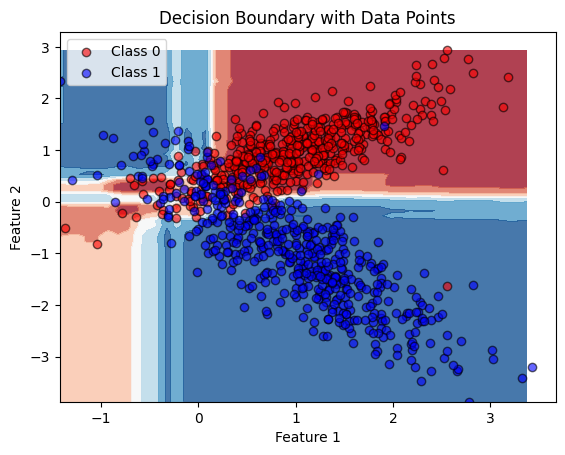

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Convert X and y to NumPy arrays if they're not already
X_np = X.to_numpy()
y_np = y.to_numpy().ravel()  # Flatten in case it's a DataFrame

# Your color map and mesh prediction result
cm = plt.cm.RdBu  # color map

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=.8, cmap=cm)

# Define class colors
colors = ['red', 'blue']

# Plot each class
for cur_class in [0, 1]:
    plt.scatter(X_np[y_np == cur_class, 0],
                X_np[y_np == cur_class, 1],
                c=colors[cur_class],
                edgecolors='k', alpha=0.6, label=f'Class {cur_class}')

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with Data Points')
plt.show()



What can you conclude from the figure above?

Basically there are very clear sections of our graph where one class is prevalent over the other.

## Parameter Selection

The implementation of the random forest algorithm in sklearn has many parameter. The most important ones are the number of trees used (n_estimators) and the maximal depth of a single tree (max_depth). Investigate how the number of used trees effects the training and testing accuracy.

<b>Exercise 3:</b>

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 20) used. This plot should look like this:
<img src="figures/num_trees.png" width="600"/>

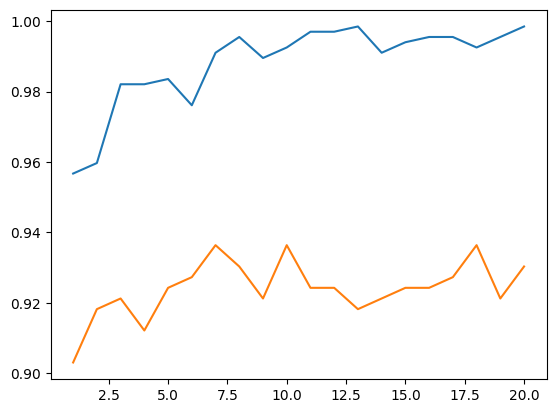

In [ ]:
### WRITE YOUR CODE HERE ###

# (n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 

# min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 

# bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 

# ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
# """

y_train_flat = y_train.ravel()
train_acc = []
test_acc = []

for i in range(1, 21):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    a = clf.score(X_train,y_train)
    b = clf.score(X_test,y_test)

    train_acc.append(a)
    test_acc.append(b)


plt.plot(range(1, 21), train_acc, label='Train Accuracy')
plt.plot(range(1, 21), test_acc, label='Test Accuracy')
    

#Welp this is performing a bit better than expected.




<b>Optional:</b>

We want to further investigate how the number of used trees effects the training and testing accuracy. 
We want to increase the number of trees to a maximum of 50.

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 50) used.

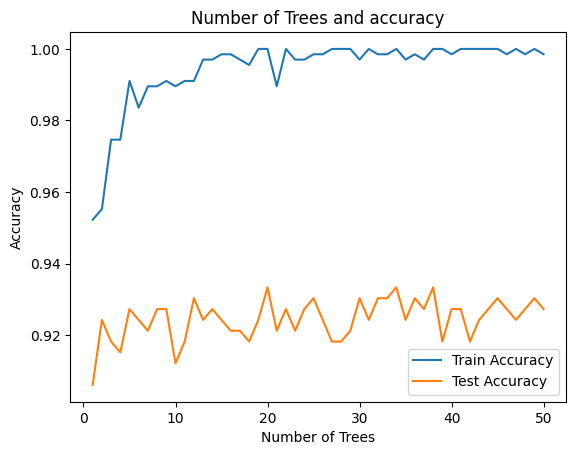

In [35]:
### WRITE YOUR CODE HERE ###

train_acc = []
test_acc = []


for i in range(1, 51):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    a = clf.score(X_train,y_train)
    b = clf.score(X_test,y_test)

    train_acc.append(a)
    test_acc.append(b)


plt.plot(range(1, 51), train_acc, label='Train Accuracy')
plt.plot(range(1, 51), test_acc, label='Test Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Number of Trees and accuracy')
plt.legend()
plt.show()




<b>Exercise 4:</b>

We saw how the number of trees influences training and testing accuracy. 
Now we do same thing for the other important parameter max_depth.
Train multiple models with different depths. 
The models should use 30 trees as estimators.

Plot a diagram that shows the training and testing accuracy depending on the maximal depth of a single tree (from 1 to 50). 
This plot should look like this:
<img src="figures/max_depth.png" width="600"/>

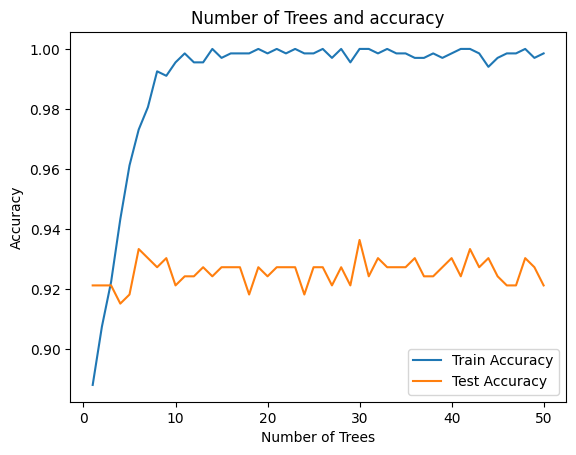

In [36]:
### WRITE YOUR CODE HERE ###
train_acc = []
test_acc = []


for i in range(1, 51):
    clf = RandomForestClassifier(n_estimators=30, max_depth=i)
    clf.fit(X_train, y_train)
    a = clf.score(X_train,y_train)
    b = clf.score(X_test,y_test)

    train_acc.append(a)
    test_acc.append(b)


plt.plot(range(1, 51), train_acc, label='Train Accuracy')
plt.plot(range(1, 51), test_acc, label='Test Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Number of Trees and accuracy')
plt.legend()
plt.show()


## Churn Data Set
Lets revisit the churn data set from the first tutorial.

In [37]:
churn_df = pd.read_csv('telecom_churn.csv')
label = churn_df['Churn']
churn_df = churn_df.drop(columns=['Churn'])

<b>Exercise 5:</b>

Create a data set containing only the numeric values. <b>Optional:</b> Try to convert all non numeric values to numeric values using a one hot encoding or by binning them. 

In [42]:
### WRITE YOUR CODE HERE ###

churn_numeric = churn_df.select_dtypes(include=[np.number])
churn_numeric



,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


<b>Exercise 6:</b>

Train a model on this data set and visualize the most important features in a figure. This should look like this (The scaling and order of features can be different):
<img src="figures/importance.png" width="600"/>

<b>Hint</b>: The method feature_importance_ should be used.
What can you conclude?

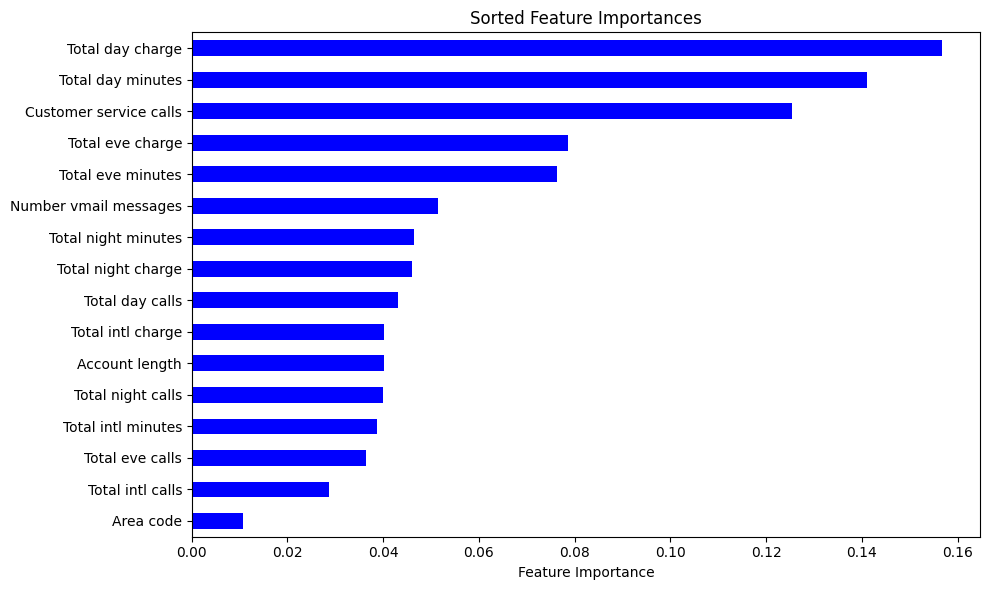

array([0.04008516, 0.01065381, 0.05147791, 0.14106842, 0.0431696 ,
       0.15685719, 0.07622583, 0.03644476, 0.07866748, 0.04644018,
       0.03988777, 0.04595669, 0.03877917, 0.02872007, 0.04021621,
       0.12534976])

In [ ]:
### WRITE YOUR CODE HERE ###

clf = RandomForestClassifier()
clf.fit(churn_numeric, label)
a = clf.feature_importances_


importances = pd.Series(clf.feature_importances_, index=churn_numeric.columns)
importances_sorted = importances.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
importances_sorted.plot(kind='barh', color='blue')
plt.xlabel('Feature Importance')
plt.title('Sorted Feature Importances')
plt.tight_layout()
plt.show()

# You can drop some features when one-hot encoding to avoid perfect coordination between features.
# 


<b>Exercise 7:</b>

If we want to use a random forest to solve regression problems we can use the RandomForestRegressor from sklearn.
* Generate an easy regression data set using make_regression with 10 features. (use function make_regression)
* Split the data set into a train and test set.
* Train a model and report the training and testing mean square error (can be calculated using sklearn.metrics.mean_squared_error)

In [ ]:
### WRITE YOUR CODE HERE ###

#Let's see, is this the same as the other one but with regression?
# Lets use the most generic stuff lol

X, y = make_regression(n_features=10)

#(n_samples=100, n_features=100, *, 
# n_informative=10, n_targets=1, bias=0.0, effective_rank=None,
#  tail_strength=0.5, noise=0.0, shuffle=True, coef=False,
#  random_state=None)
# So, way more features than last time. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)
#Split pretty simple i hope.

clf = RandomForestRegressor()
clf.fit(X_train, y_train)

#I cant use the score unfortunately cause it calculates r2, which measures how well the model explains the variance in the data.
# so predict it is
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, clf.predict(X_train))
test_mse = mean_squared_error(y_test, clf.predict(X_test))

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

print(f'Train MSE: {vars(train_mse}')
print(f'Test MSE: {test_mse}')


#You need the variance of the data to interpret our knowledge

Train MSE: 3315.46524489964
Test MSE: 17916.963869131272
